In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("owid-energy-data.csv")
#SOURCE: https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption/data

In [4]:
# Display basic dataset information
print("Dataset Head:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

Dataset Head:
          country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                      NaN                      NaN                  NaN   
4                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  ...  solar_share_elec  solar_share_en

In [5]:
cols = ['iso_code','country', 'year', 'renewables_consumption', 'biofuel_consumption', 'coal_consumption', 'gas_consumption',
               'hydro_consumption', 'nuclear_consumption', 'oil_consumption',
               'solar_consumption', 'wind_consumption', 'other_renewable_consumption']

energy_cols = ['biofuel_consumption', 'coal_consumption', 'gas_consumption',
               'hydro_consumption', 'nuclear_consumption', 'oil_consumption',
               'solar_consumption', 'wind_consumption', 'other_renewable_consumption']

df = df[cols]
df.rename({"iso_code":"SOV_A3"}, axis=1, inplace=True)

In [6]:
df=df[df['year']>=2003]
nulls=(df.isna().sum()) / (df.isna().sum() + df.count())
print("Total Null values per column\n", nulls)

Total Null values per column
 SOV_A3                         0.224388
country                        0.000000
year                           0.000000
renewables_consumption         0.654364
biofuel_consumption            0.720938
coal_consumption               0.635392
gas_consumption                0.637461
hydro_consumption              0.654364
nuclear_consumption            0.539841
oil_consumption                0.627285
solar_consumption              0.628838
wind_consumption               0.627285
other_renewable_consumption    0.627285
dtype: float64


In [7]:
df.head()
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
               year  renewables_consumption  biofuel_consumption  \
count  5798.000000             2004.000000          1618.000000   
mean   2012.639703              972.330774            60.802330   
std       5.897701             2441.610061           149.834917   
min    2003.000000                0.002000             0.000000   
25%    2008.000000               21.062000             0.285500   
50%    2013.000000               83.565000             2.208500   
75%    2018.000000              393.086250            21.399000   
max    2023.000000            25064.225000          1317.625000   

       coal_consumption  gas_consumption  hydro_consumption  \
count       2114.000000      2102.000000        2004.000000   
mean        2499.356102      2032.379954         619.659775   
std         7337.327052      4898.252458        1502.976367   
min            0.000000         0.000000           0.000000   
25%           10.721500        49.471000           9.909000

In [8]:
bar = df.groupby('year')[energy_cols].sum()
bar.reset_index(level=0, inplace=True)
bar.head()

,year,biofuel_consumption,coal_consumption,gas_consumption,hydro_consumption,nuclear_consumption,oil_consumption,solar_consumption,wind_consumption,other_renewable_consumption
0,2003,1007.885,191603.887,157370.923,45354.065,46617.431,271314.263,40.432,1224.773,4166.551
1,2004,1207.238,204594.642,163441.980,48424.321,48370.295,281952.844,53.339,1643.599,4521.997
2,2005,1420.655,219484.607,167785.001,49662.657,48147.152,285382.969,75.984,1990.304,4911.644
3,2006,1806.240,230843.338,172066.985,51249.124,48404.932,288292.179,105.315,2500.387,5243.878
4,2007,2418.958,243925.593,178837.587,51752.972,47057.896,291410.060,143.095,3189.456,5700.134


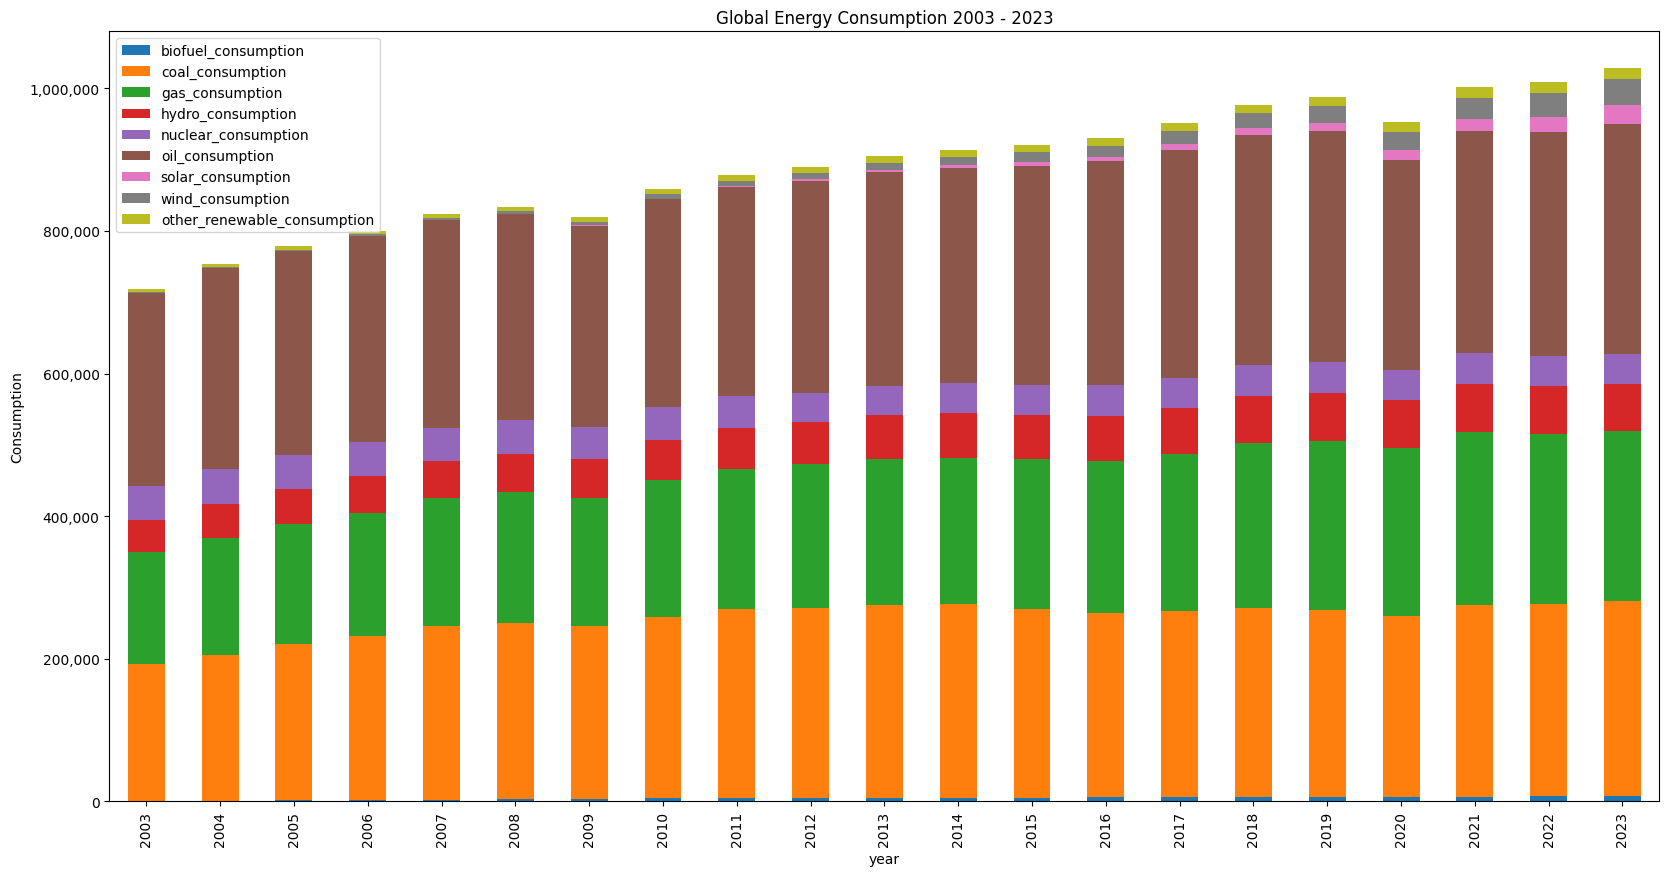

In [9]:
from matplotlib.ticker import StrMethodFormatter
ax = bar.plot(x='year', ylabel='Consumption', kind='bar', stacked=True,figsize=(20,10),
        title='Global Energy Consumption 2003 - 2023')

ax.ticklabel_format(useOffset=False, style='plain', axis='y')

ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()

In [10]:
# load country shapefile 
shapes = gpd.read_file("shape/ne_110m_admin_0_countries.shp")
shapes['SOV_A3'] = shapes['SOV_A3'].replace({'US1': 'USA'})
shapes['SOV_A3'] = shapes['SOV_A3'].replace({'SDS': 'SSD'})


country_shapes = shapes[["SOV_A3","geometry"]]
mena_shapes = country_shapes[country_shapes["SOV_A3"].isin(df["SOV_A3"])].copy()
print(mena_shapes.head())
# merge the two shapefile
r_energy = df.merge(mena_shapes, on='SOV_A3')


# Convert Pandas Dataframe to geopandas
renewables_gdf = gpd.GeoDataFrame(
    r_energy, geometry=r_energy["geometry"])

  SOV_A3                                           geometry
0    FJI  MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...
1    TZA  POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...
3    CAN  MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...
4    USA  MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...
6    UZB  POLYGON ((55.96819 41.30864, 55.92892 44.99586...


<Axes: title={'center': 'Global Gas Energy Consumption'}>

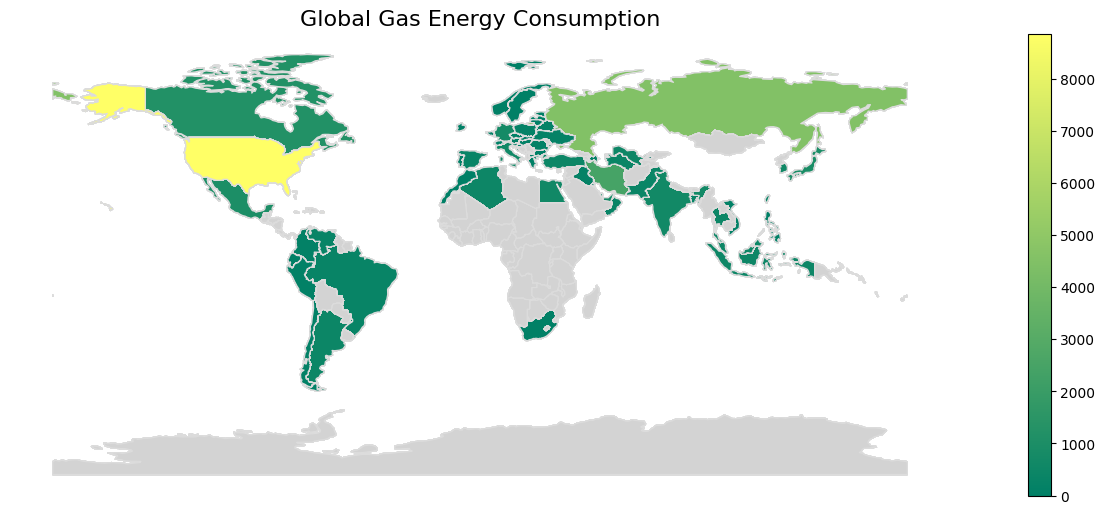

In [11]:
fig, ax = plt.subplots(1, figsize=(20, 6))
ax.axis('off')
ax.set_title('Global Gas Energy Consumption', fontdict={'fontsize': '16', 'fontweight' : '4'})

renewables_gdf.plot(column='gas_consumption',
            cmap='summer',
            edgecolor="gainsboro",
            linewidth=0.9,
            ax=ax,
            legend=True,
            missing_kwds={
            "color": "lightgrey",
            "label": "Missing values",},)

<Axes: title={'center': 'Global Coal Consumption'}>

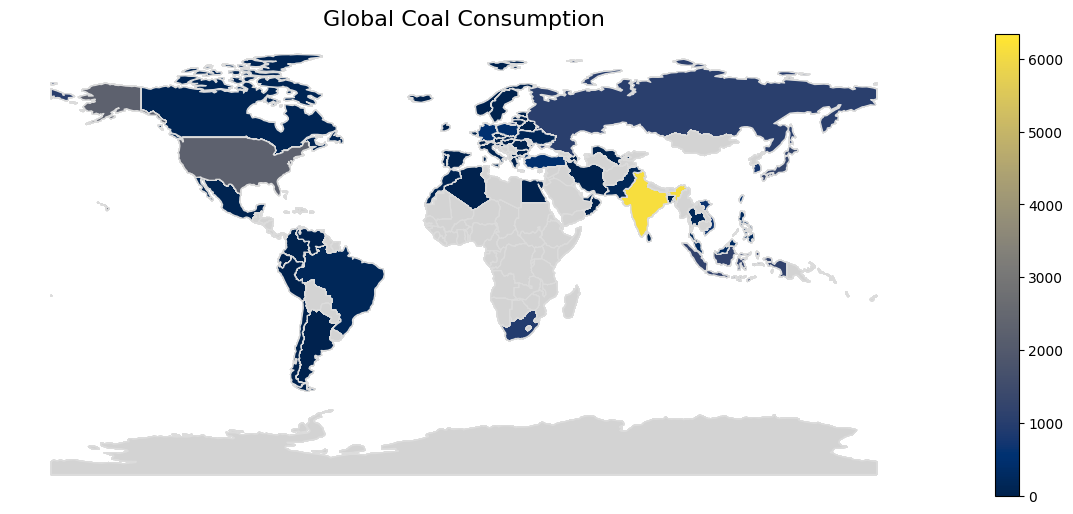

In [12]:
fig, ax = plt.subplots(1, figsize=(20, 6))
ax.axis('off')
ax.set_title('Global Coal Consumption', fontdict={'fontsize': '16', 'fontweight' : '4'})

renewables_gdf.plot(column='coal_consumption',
            cmap='cividis',
            edgecolor="gainsboro",
            linewidth=0.9,
            ax=ax,
            legend=True,
            missing_kwds={
            "color": "lightgrey",
            "label": "Missing values",},)

In [13]:
coal_result = df.groupby("year", as_index=False)["coal_consumption"].mean() 
gas_result = df.groupby("year", as_index=False)["gas_consumption"].mean() 
oil_result = df.groupby("year", as_index=False)["oil_consumption"].mean() 
biofuel_result = df.groupby("year", as_index=False)["biofuel_consumption"].mean() 
solar_result = df.groupby("year", as_index=False)["solar_consumption"].mean() 
wind_result = df.groupby("year", as_index=False)["wind_consumption"].mean() 
hydro_result = df.groupby("year", as_index=False)["hydro_consumption"].mean() 
nuclear_result = df.groupby("year", as_index=False)["nuclear_consumption"].mean() 

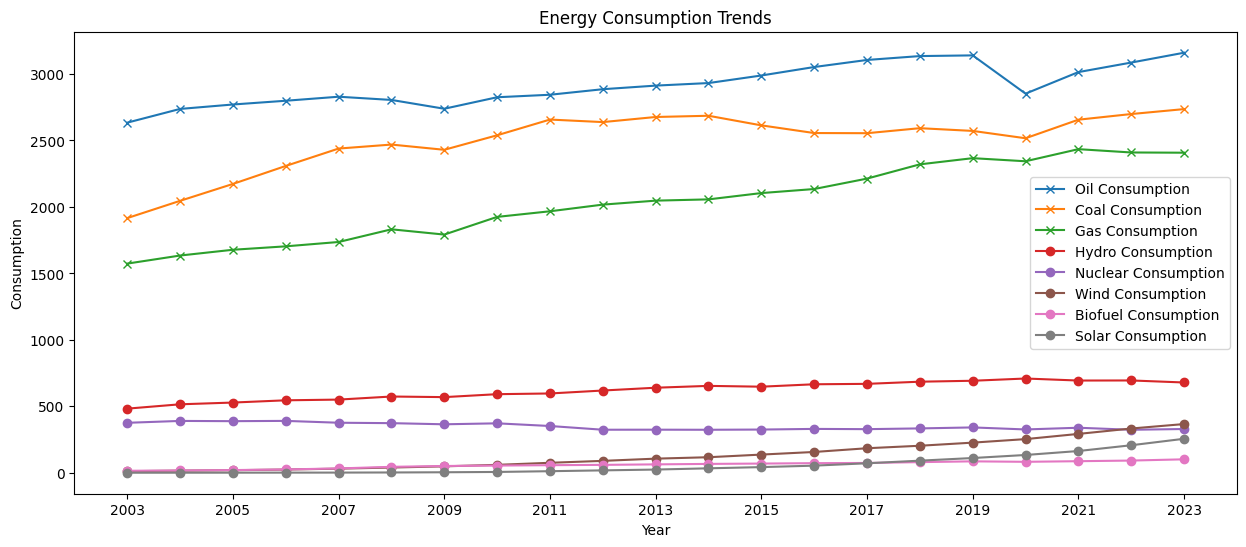

In [15]:
plt.figure(figsize=(15, 6))
plt.plot(oil_result['year'], oil_result['oil_consumption'], label='Oil Consumption', marker='x')
plt.plot(coal_result['year'], coal_result['coal_consumption'], label='Coal Consumption', marker='x')
plt.plot(gas_result['year'], gas_result['gas_consumption'], label='Gas Consumption', marker='x')
plt.plot(hydro_result['year'], hydro_result['hydro_consumption'], label='Hydro Consumption', marker='o')
plt.plot(nuclear_result['year'], nuclear_result['nuclear_consumption'], label='Nuclear Consumption', marker='o')
plt.plot(wind_result['year'], wind_result['wind_consumption'], label='Wind Consumption', marker='o')
plt.plot(biofuel_result['year'], biofuel_result['biofuel_consumption'], label='Biofuel Consumption', marker='o')
plt.plot(solar_result['year'], solar_result['solar_consumption'], label='Solar Consumption', marker='o')
plt.xticks(np.arange(2003, 2024, step=2))
plt.title(f"Energy Consumption Trends")
plt.xlabel("Year")
plt.ylabel("Consumption")
plt.legend()
plt.show()